# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Effective Data Visualization: Stock prices data</b></p>


- In this project, we will visualize stock prices using Seaborn and Matplotlib. 4 Stocks are considered including JP Morgan Chase (JP), Procter and Gamble (P&G) (PG), Apple (AAPL) and United Airlines (UAL).
- Using the stock_daily_prices.csv and stocks_daily_returns.csv dataset included in the course/workshop package, please do the following:
    - Import both datasets using Pandas.
    - Using Matplotlib, plot lineplots that display all 4 stocks daily prices on one single figure.
    - Using Matplotlib, plot 4 stocks daily prices on multiple subplots.
    - Using Matplotlib, plot the 4 plots on subplots next to each other (all figures in one row).
    - Using Matplotlib, plot the scatterplot between Apple and JP Morgan daily returns. 
    - Using Seaborn, plot similar scatterplot between Apple and JP Morgan daily returns. 
    - Assume that you decided to become bullish on AAPL and you allocated 70% of your assets in it. You also decided to equally divide the rest of your assets in other stocks (JPM, PG, and UAL). Using Matplotlib, plot a pie chart that shows these allocations. Use 'explode’ attribute to increase the separation between AAPL and the rest of the portfolio.
    - Using Matplotlib, plot the histogram for United Airlines and P&G returns using 40 bins with red color. Display the mean and Standard deviation for both stocks on top of the figure. What did you conclude from this graph?
    - Using Seaborn, plot a heatmap that shows the correlations between stocks daily returns. Comment on the correlation between UAL and P&G.
    - Plot a 3D plot showing all daily returns from JPM, AAPL and UAL [External Research is required].

In [9]:
stocks_prices= pd.read_csv("stocks_daily_prices.csv")
stocks_returns = pd.read_csv("stocks_daily_returns.csv")

In [8]:
stocks_prices.tail()

,Date,AAPL,JPM,PG,UAL
3637,6/13/2022,131.880005,115.989998,138.149994,37.020000
3638,6/14/2022,132.759995,114.059998,133.839996,36.990002
3639,6/15/2022,135.429993,115.410004,132.509995,37.889999
3640,6/16/2022,130.059998,113.430000,133.320007,34.779999
3641,6/17/2022,131.559998,113.029999,132.360001,36.279999


Analyzing the Performance of a Single Company: By examining a company's daily stock price, trading volume, market value, return, and volatility, you can see how the company's performance has changed over time. This analysis can help you determine whether a company is suitable for investment. Comparing the Performance of Multiple Companies: By comparing the daily returns of multiple companies, you can assess their risk and return potential. This analysis can assist you in selecting the best companies for your investment portfolio. Analyzing the Overall Market Performance: By comparing the daily returns of all companies, you can observe the overall performance of the market. This analysis can help you identify market trends and adjust your investment strategy accordingly.

For example, using the stock_daily_prices dataset, you can see how each company's daily stock price has changed. This can help you understand how a company's performance has evolved over time.

By using the stocks_daily_returns dataset, you can see how each company's daily return has changed. This can assist you in understanding a company's risk and return potential.

### See if there is a decline for 2020. Why did the shares decline on that date?

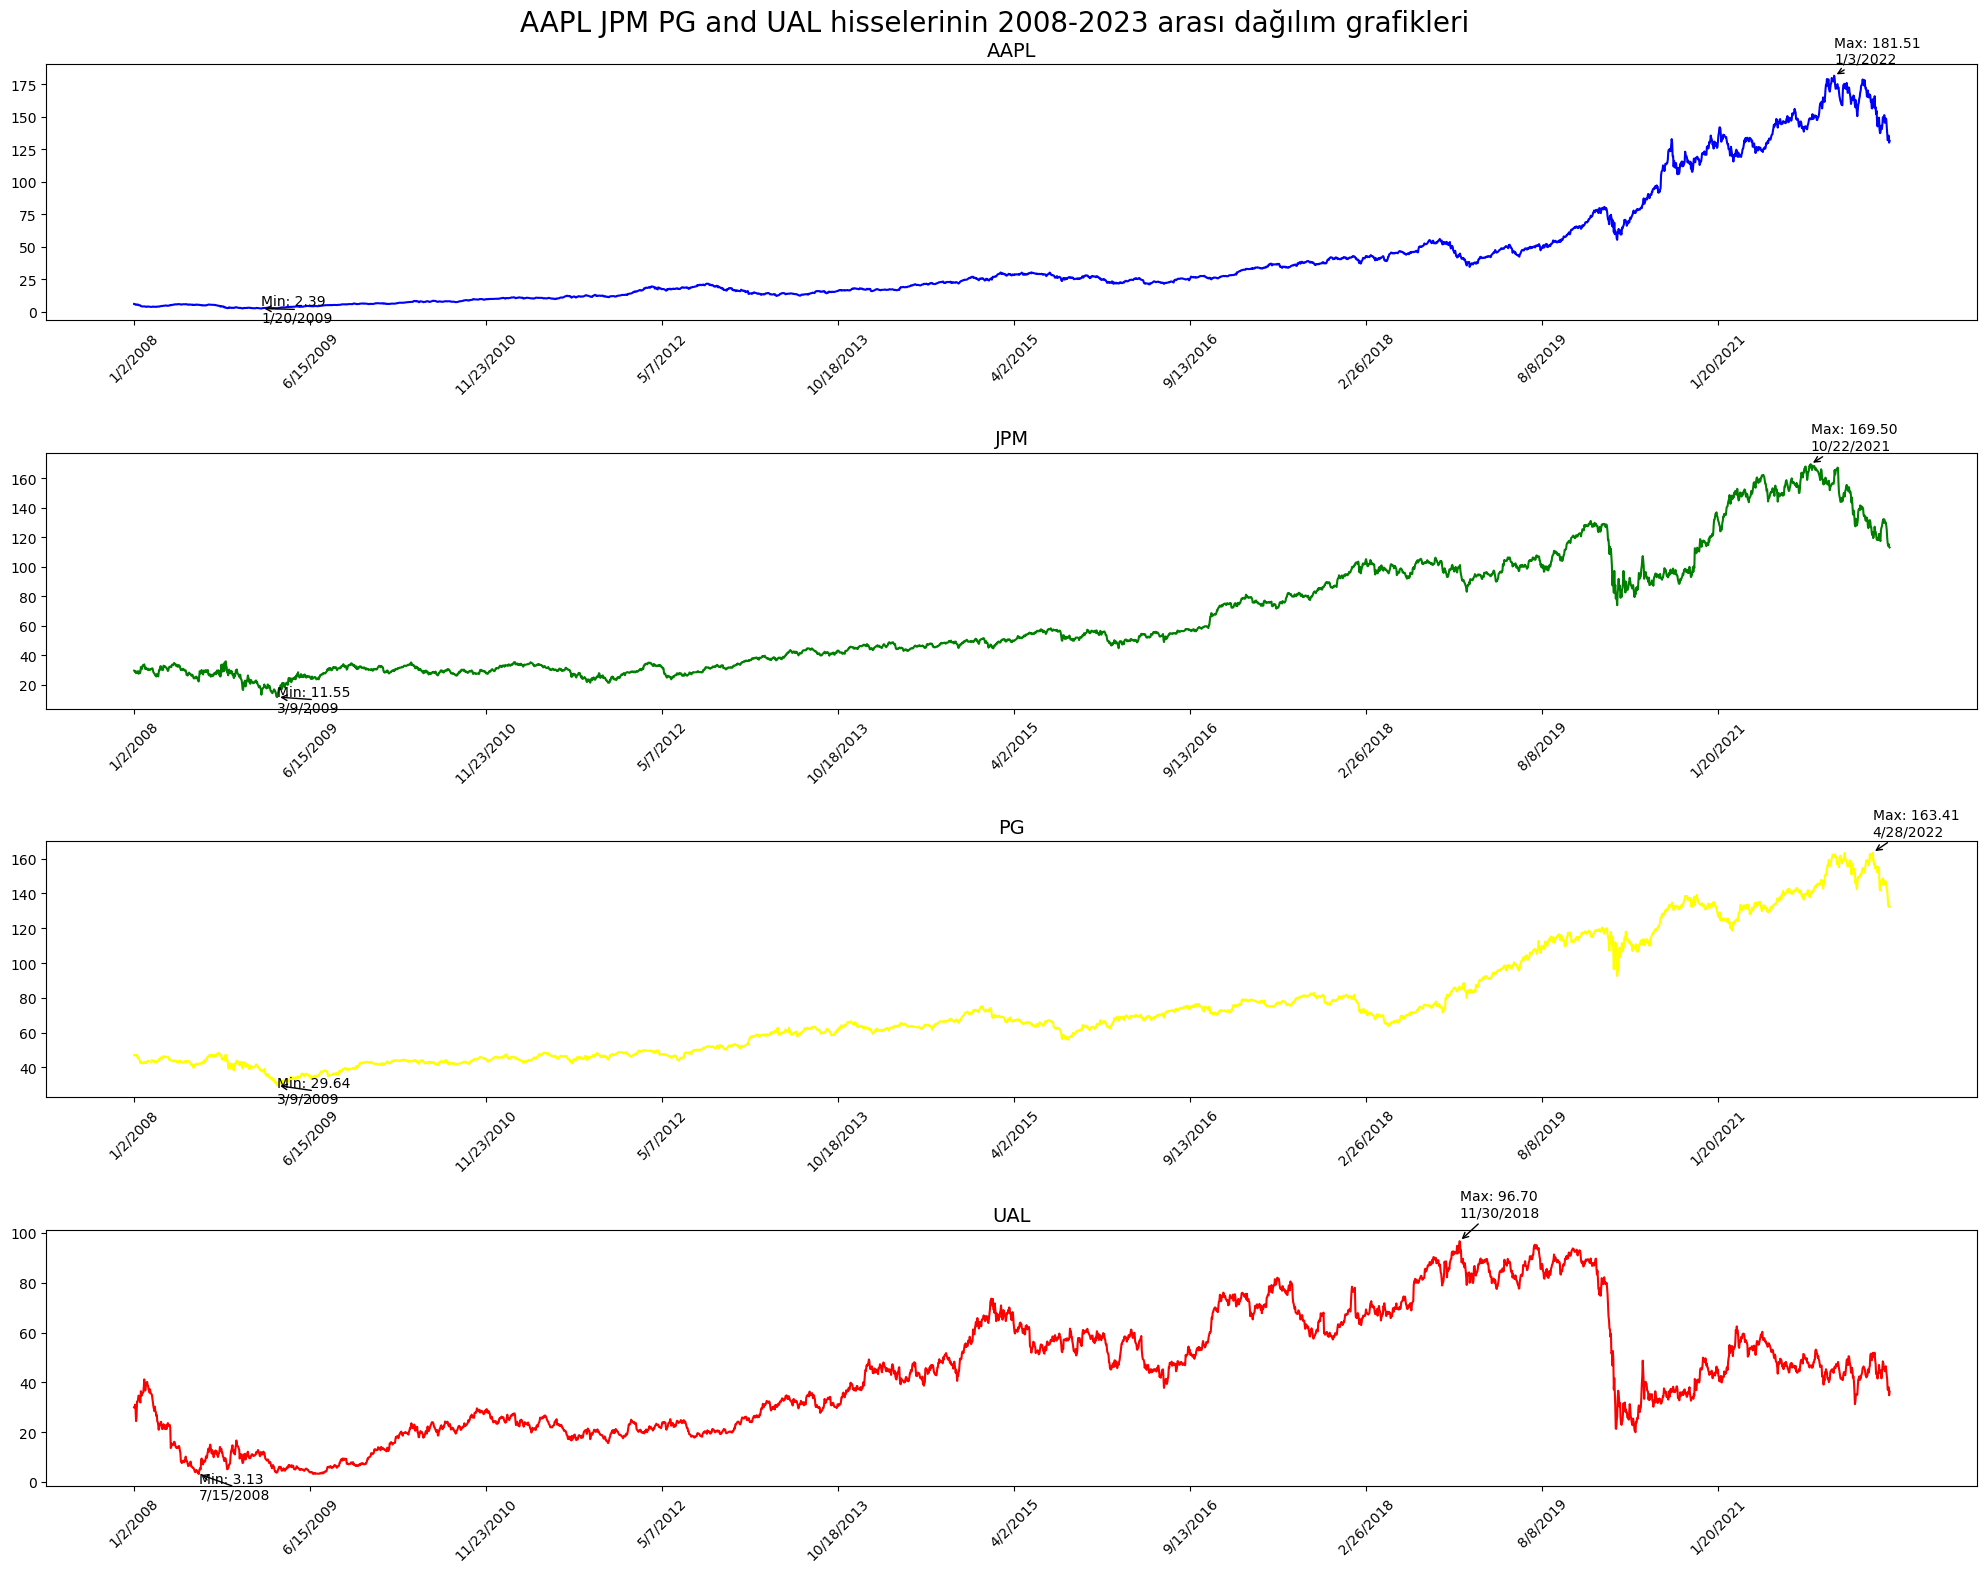

In [82]:
fig, ax= plt.subplots(4,1, figsize= (20,16))

ax[0].plot(stocks_prices["Date"], stocks_prices["AAPL"], "b");
ax[0].set_title("AAPL", fontsize=14)

ax[1].plot(stocks_prices["Date"], stocks_prices["JPM"], "green");
ax[1].set_title("JPM", fontsize=14)

ax[2].plot(stocks_prices["Date"], stocks_prices["PG"],"yellow");
ax[2].set_title("PG", fontsize=14)

ax[3].plot(stocks_prices["Date"], stocks_prices["UAL"], "r");
ax[3].set_title("UAL", fontsize= 14)


fig.suptitle("AAPL JPM PG and UAL hisselerinin 2008-2023 arası dağılım grafikleri", fontsize=20)

tick_interval = 365
for i in range(4):
    ax[i].set_xticks(stocks_prices["Date"][::tick_interval])
    ax[i].tick_params(axis='x', rotation=45)
    
for i, stock_symbol in enumerate(["AAPL", "JPM", "PG", "UAL"]):
    max_value_date = stocks_prices.loc[stocks_prices[stock_symbol].idxmax()]["Date"]
    min_value_date = stocks_prices.loc[stocks_prices[stock_symbol].idxmin()]["Date"]
    max_value = stocks_prices.loc[stocks_prices[stock_symbol].idxmax()][stock_symbol]
    min_value = stocks_prices.loc[stocks_prices[stock_symbol].idxmin()][stock_symbol]

    ax[i].annotate(f'Max: {max_value:.2f}\n{max_value_date}', xy=(max_value_date, max_value),
                   xytext=(max_value_date, max_value + 10), arrowprops=dict(facecolor='black', arrowstyle='->'))

    ax[i].annotate(f'Min: {min_value:.2f}\n{min_value_date}', xy=(min_value_date, min_value),
                   xytext=(min_value_date, min_value - 10), arrowprops=dict(facecolor='black', arrowstyle='->'))


plt.tight_layout()
plt.show()

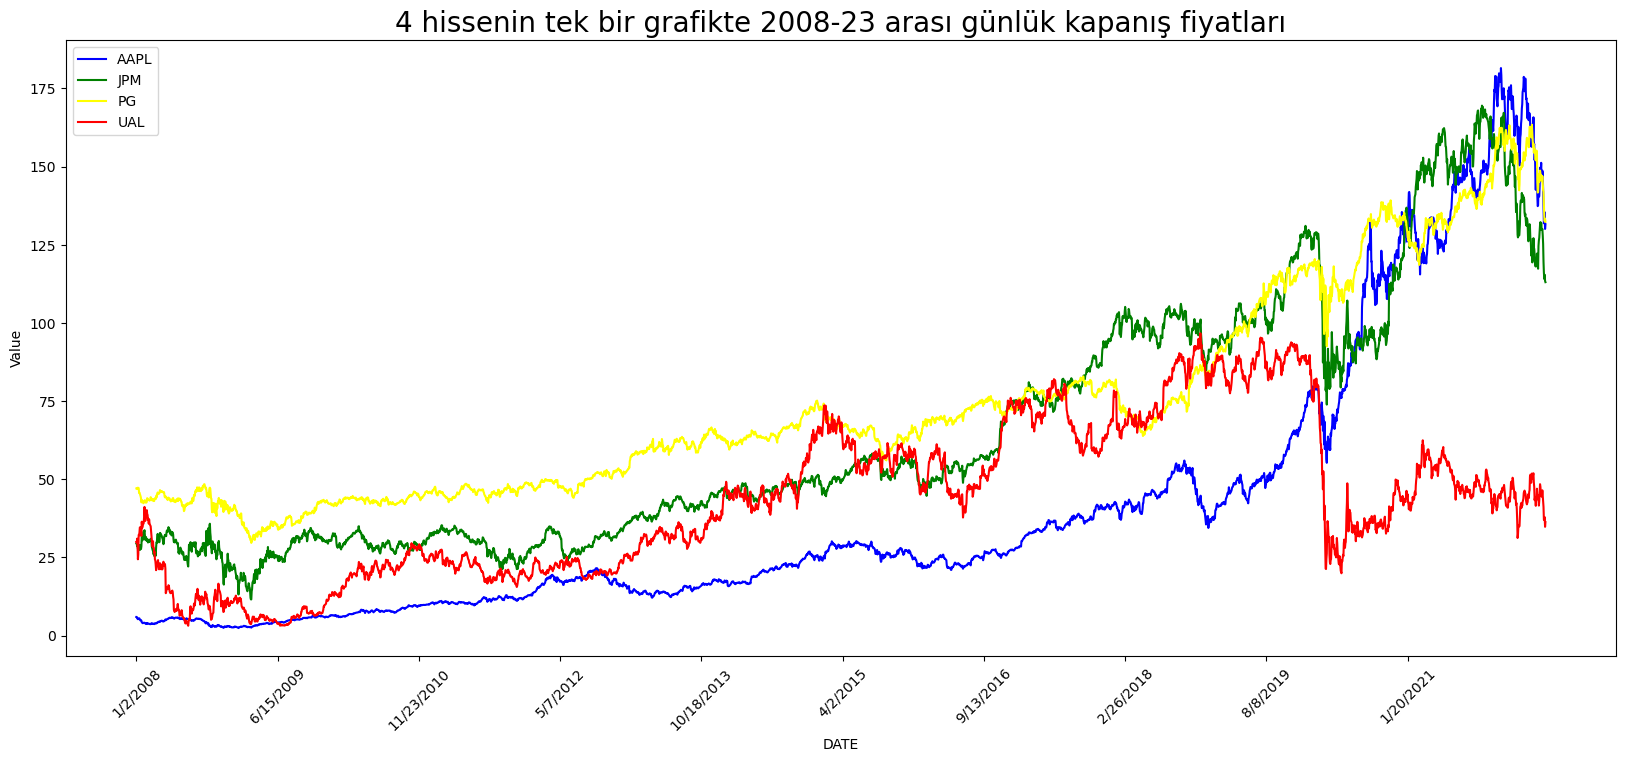

In [135]:
plt.figure(figsize=(20,8))
plt.plot(stocks_prices["Date"], stocks_prices["AAPL"], "b", label="AAPL");
plt.plot(stocks_prices["Date"], stocks_prices["JPM"], "green", label="JPM");
plt.plot(stocks_prices["Date"], stocks_prices["PG"],"yellow",label="PG");
plt.plot(stocks_prices["Date"], stocks_prices["UAL"], "r",label="UAL");

tick_interval = 365
plt.xticks(stocks_prices["Date"][::tick_interval], rotation=45)

plt.title("4 hissenin tek bir grafikte 2008-23 arası günlük kapanış fiyatları", fontsize=20)
plt.ylabel("Value")
plt.xlabel("DATE")

plt.legend()
plt.show();

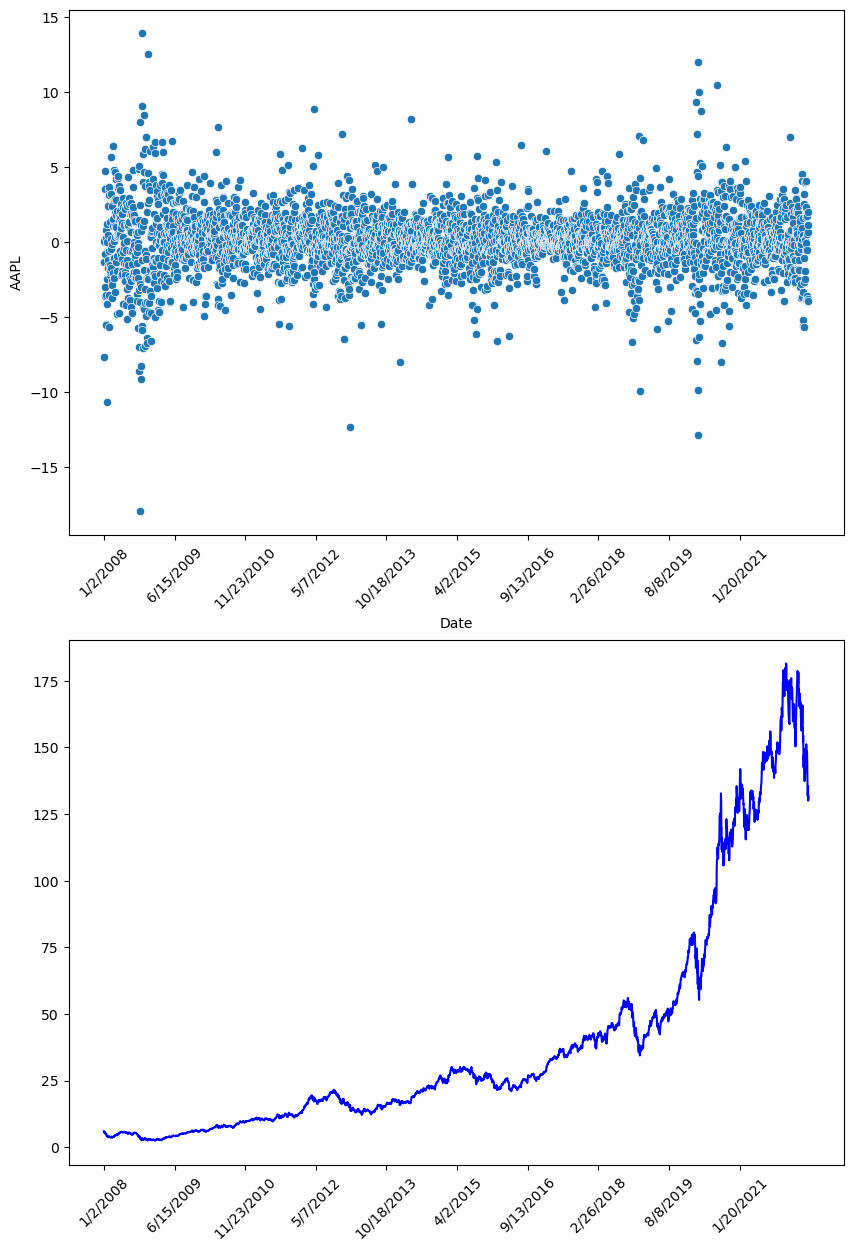

In [93]:
fig, ax= plt.subplots(2,1, figsize=(10,15))

sns.scatterplot(data=stocks_returns, x= "Date", y="AAPL", ax=ax[0]);
ax[1].plot(stocks_prices["Date"], stocks_prices["AAPL"], "b");

for i in range(2):
    ax[i].set_xticks(stocks_prices["Date"][::tick_interval])
    ax[i].tick_params(axis='x', rotation=45)

plt.show()

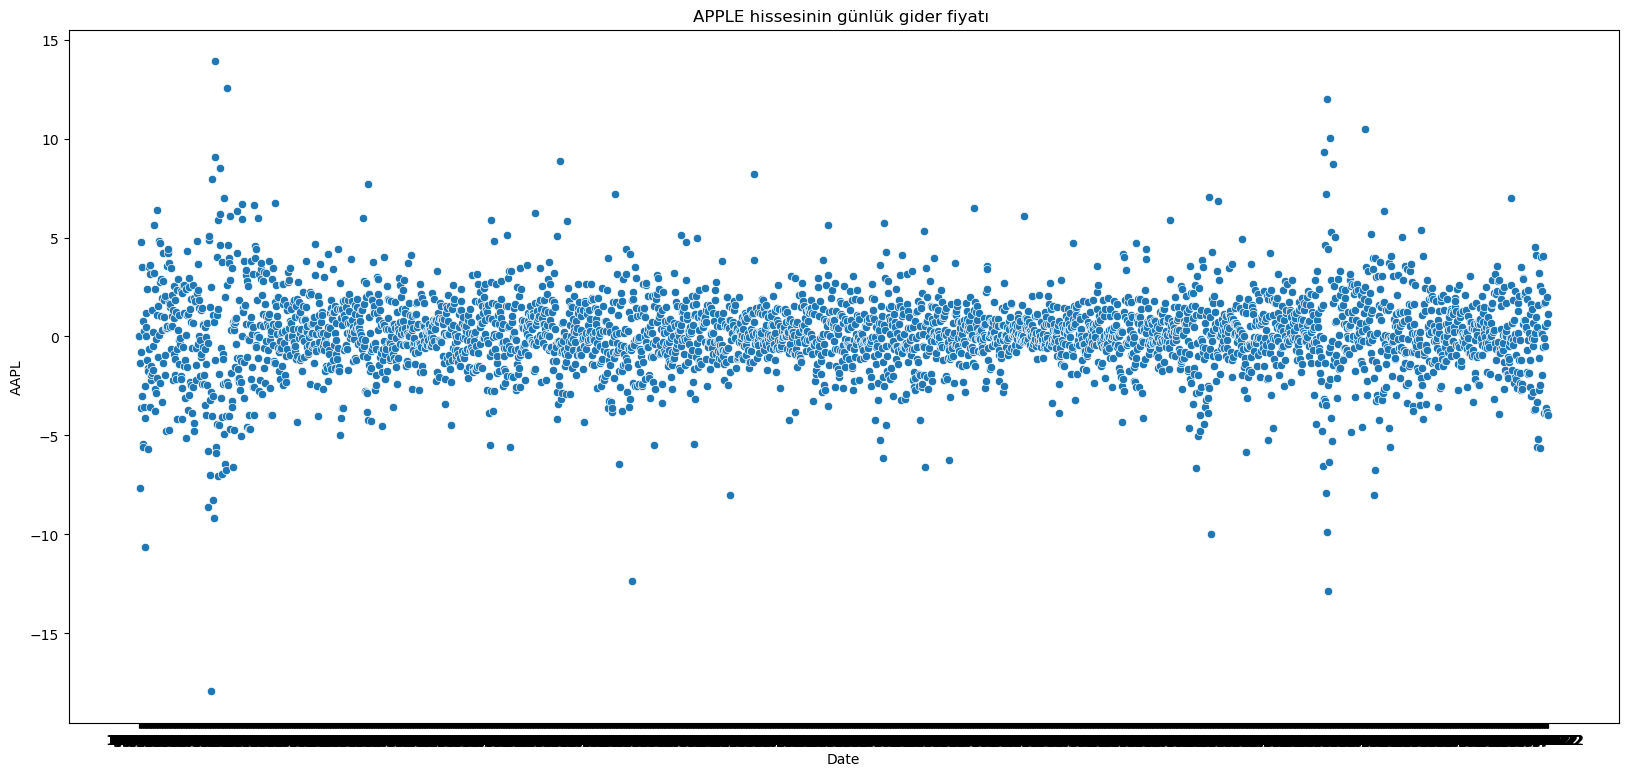

In [87]:
plt.figure(figsize=(20,9))
sns.scatterplot(data=stocks_returns, x= "Date", y="AAPL");

plt.title("APPLE hissesinin günlük gider fiyatı ")
plt.show()

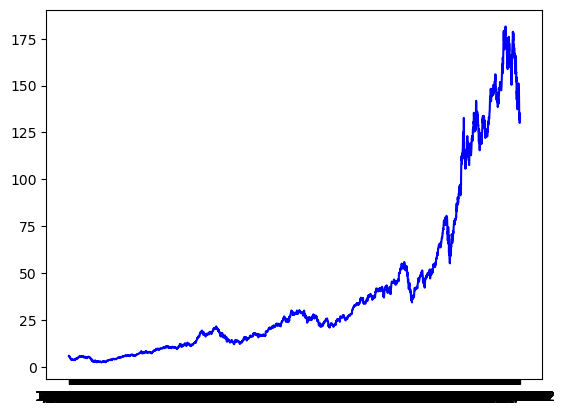

In [30]:
plt.plot(stocks_prices["Date"], stocks_prices["AAPL"], "b");


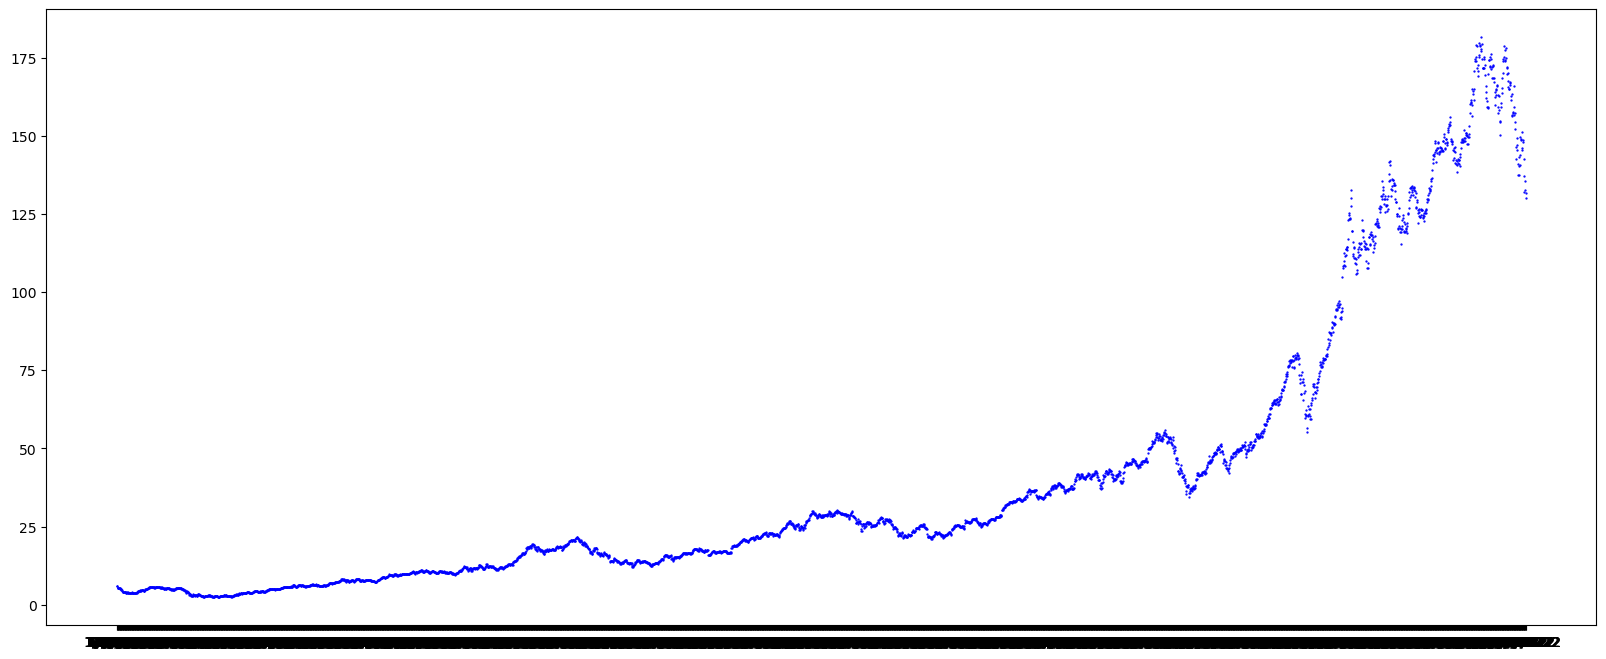

In [34]:
plt.figure(figsize=(20,8))
plt.scatter(stocks_prices["Date"],stocks_prices["AAPL"],c="blue", s=0.4);

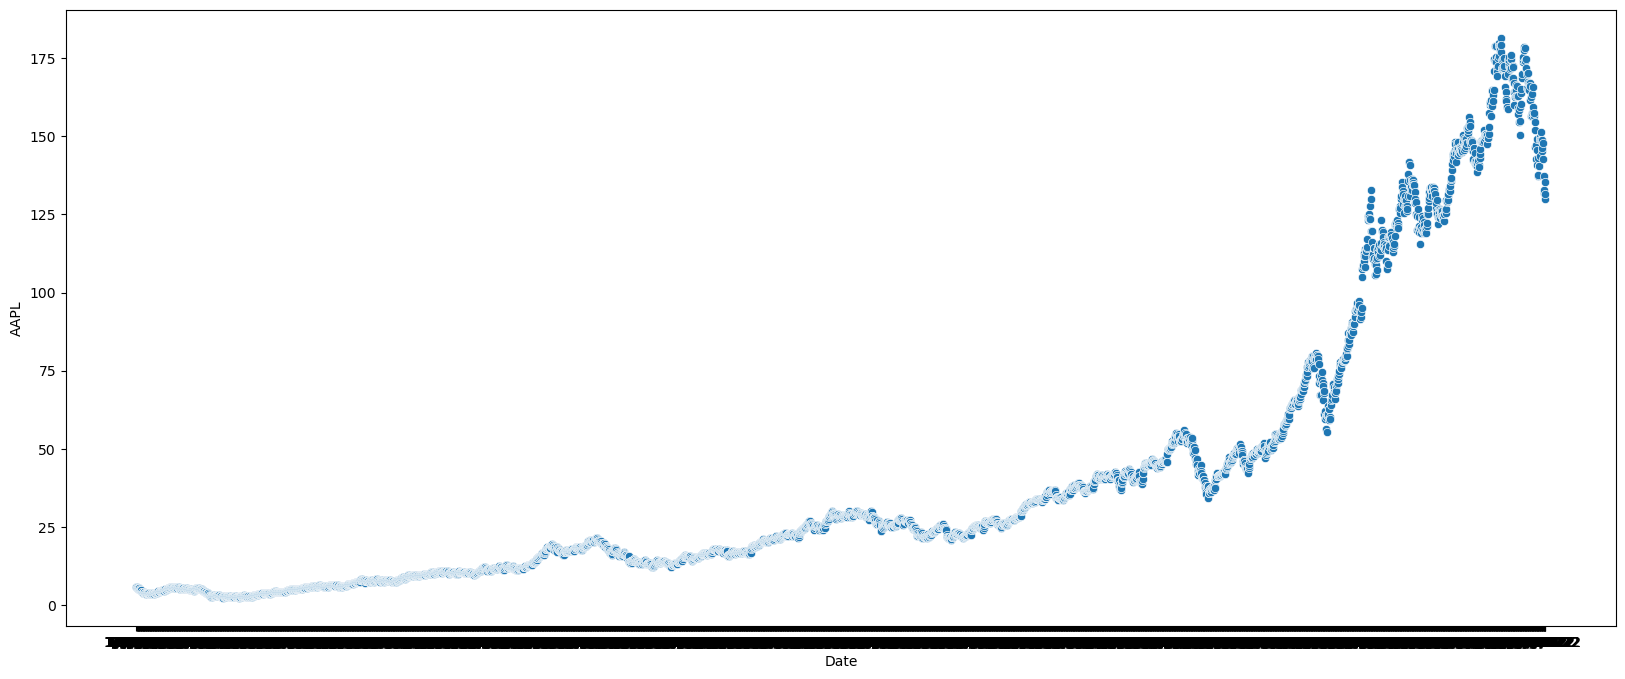

In [36]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=stocks_prices["Date"], y=stocks_prices["AAPL"]);

In [96]:
stocks_alloc = pd.DataFrame(data = {'allocation %':[70, 10, 10, 10]}, index = ['AAPL', 'JPM', 'PG', 'UAL'])
stocks_alloc

,allocation %
AAPL,70
JPM,10
PG,10
UAL,10


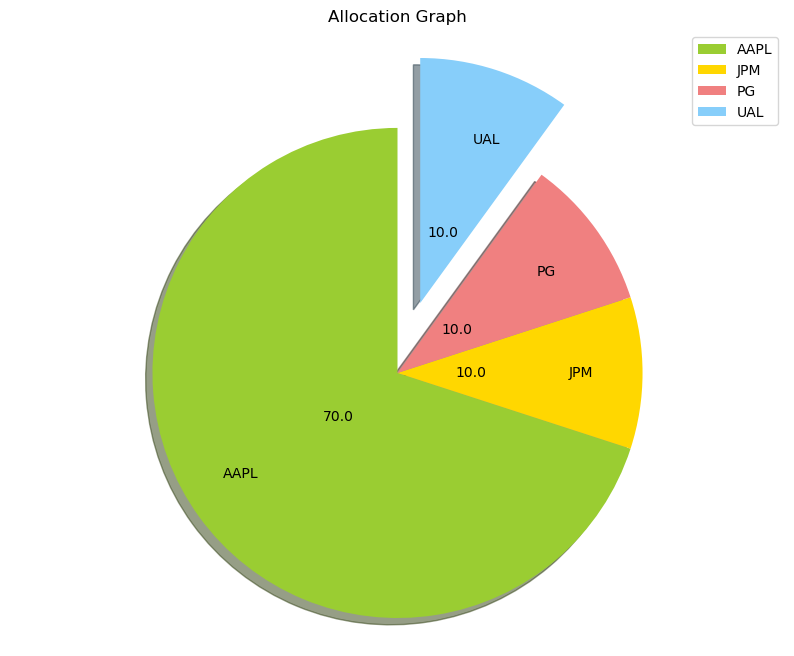

In [98]:
plt.figure(figsize=(10,8))

explode_list= [0,0,0,0.3]

color_list = ["yellowgreen","gold", "lightcoral", "lightskyblue"]


plt.pie(stocks_alloc["allocation %"], labels = stocks_alloc.index, 
        labeldistance=0.7, 
        autopct="%.1f", 
        startangle=90, 
        shadow=True,  
        explode= explode_list,
        pctdistance=0.3, 
        colors= color_list
       )


plt.title('Allocation Graph')

plt.legend(loc=(0))

plt.axis('equal')  
plt.show()



Using Matplotlib, draw a histogram with 40 red boxes for the returns of United Airlines and P&G. Display the mean and standard deviation on top of the graph for both stocks. What conclusion can you draw from this graph?

In [63]:
average_UAL = stocks_returns["UAL"].mean()
average_UAL

0.09886573228034047

In [68]:
average_PG = stocks_returns["PG"].mean()
average_PG

0.0355785576350906

In [69]:
std_UAL = stocks_returns["UAL"].std()
std_UAL

4.36140197456218

In [70]:
std_PG = stocks_returns["PG"].std()
std_PG

1.1989770738608498

In [71]:
stocks_returns.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,3642.0,0.105180,2.003500,-17.919513,-0.797108,0.099403,1.129585,13.904950
JPM,3642.0,0.069331,2.559122,-20.727418,-0.889705,0.017241,1.002644,25.096737
PG,3642.0,0.035579,1.198977,-8.737353,-0.482903,0.037285,0.595436,12.009046
UAL,3642.0,0.098866,4.361402,-36.770882,-1.553845,0.016636,1.636975,68.537079


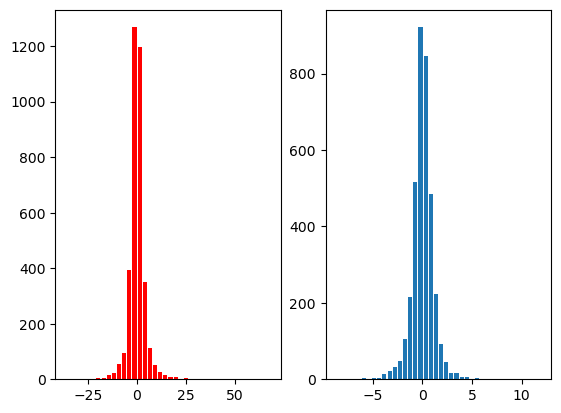

In [58]:
fig, ax = plt.subplots(1,2)
ax[0].hist(stocks_returns["UAL"], bins=40, rwidth=0.8, color="r")
ax[1].hist(stocks_returns["PG"], bins=40, rwidth=0.8)
plt.show()


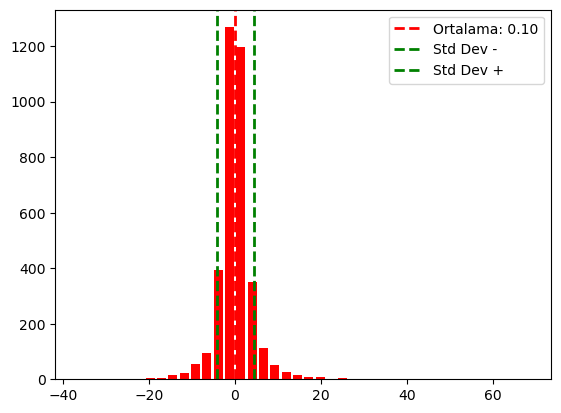

In [67]:

plt.hist(stocks_returns["UAL"], bins=40, rwidth=0.8, color="r")

plt.axvline(average_UAL, color='red', linestyle='dashed', linewidth=2, label=f'Ortalama: {average_UAL:.2f}')
plt.axvline(average_UAL - std_UAL, color='green', linestyle='dashed', linewidth=2, label=f'Std Dev -')
plt.axvline(average_UAL + std_UAL, color='green', linestyle='dashed', linewidth=2, label=f'Std Dev +')

plt.legend()

plt.show()

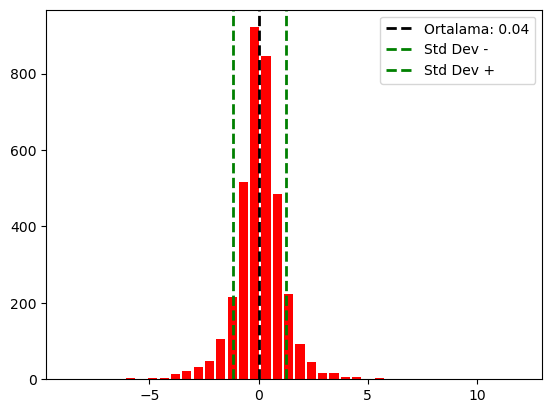

In [73]:

plt.hist(stocks_returns["PG"], bins=40, rwidth=0.8, color="r")

plt.axvline(average_PG, color='black', linestyle='dashed', linewidth=2, label=f'Ortalama: {average_PG:.2f}')
plt.axvline(average_PG - std_PG, color='green', linestyle='dashed', linewidth=2, label=f'Std Dev -')
plt.axvline(average_PG + std_PG, color='green', linestyle='dashed', linewidth=2, label=f'Std Dev +')

plt.legend()

plt.show()

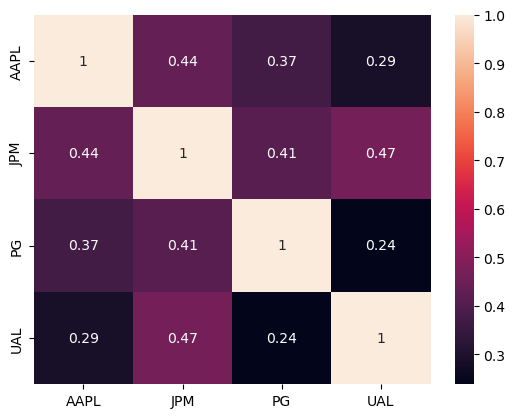

In [77]:
numeric_stocks = stocks_returns.select_dtypes(include=[np.number])

correlation_matrix2 = numeric_stocks.corr()

sns.heatmap(correlation_matrix2, annot=True);

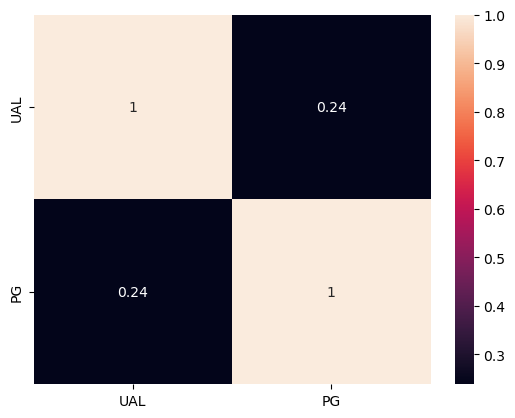

In [78]:
numeric_stocks = stocks_returns[["UAL", "PG"]].select_dtypes(include=[np.number])

correlation_matrix2 = numeric_stocks.corr()

sns.heatmap(correlation_matrix2, annot=True);

In [79]:
from mpl_toolkits.mplot3d import Axes3D


In [88]:
stocks_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3642 non-null   datetime64[ns]
 1   AAPL    3642 non-null   float64       
 2   JPM     3642 non-null   float64       
 3   PG      3642 non-null   float64       
 4   UAL     3642 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 142.4 KB


In [87]:
stocks_returns['Date'] = pd.to_datetime(stocks_returns['Date'])


In [14]:
df= stocks_returns
df

,Date,AAPL,JPM,PG,UAL
0,1/2/2008,0.000000,0.000000,0.000000,0.000000
1,1/3/2008,0.046203,-0.687708,0.000000,-0.750233
2,1/4/2008,-7.633517,-2.268378,-0.401072,4.409454
3,1/7/2008,-1.338518,1.001718,0.652615,-5.870973
4,1/8/2008,-3.597157,-3.967066,0.262103,-16.415356
...,...,...,...,...,...
3637,6/13/2022,-3.828484,-2.977838,-2.677001,-10.058308
3638,6/14/2022,0.667265,-1.663937,-3.119796,-0.081034
3639,6/15/2022,2.011147,1.183593,-0.993725,2.433084
3640,6/16/2022,-3.965145,-1.715625,0.611284,-8.207972


In [15]:
import matplotlib.dates as mdates

date_numbers = mdates.date2num(df.index)

In [16]:
df.index

RangeIndex(start=0, stop=3642, step=1)

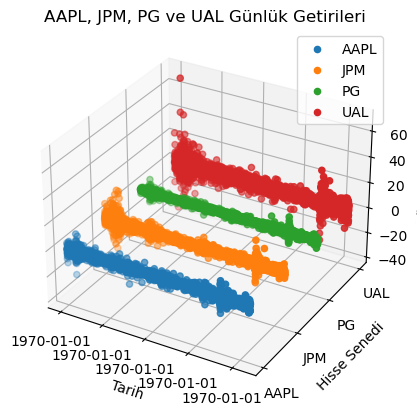

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

date_numbers = mdates.date2num(df.index)

ax.scatter(date_numbers, [0] * len(df), df['AAPL'], label='AAPL')
ax.scatter(date_numbers, [1] * len(df), df['JPM'], label='JPM')
ax.scatter(date_numbers, [2] * len(df), df['PG'], label='PG')
ax.scatter(date_numbers, [3] * len(df), df['UAL'], label='UAL')

ax.set_xlabel('Tarih')
ax.set_ylabel('Hisse Senedi')
ax.set_zlabel('Günlük Getiri')
ax.set_title('AAPL, JPM, PG ve UAL Günlük Getirileri')


ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(['AAPL', 'JPM', 'PG', 'UAL'])

ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.show()

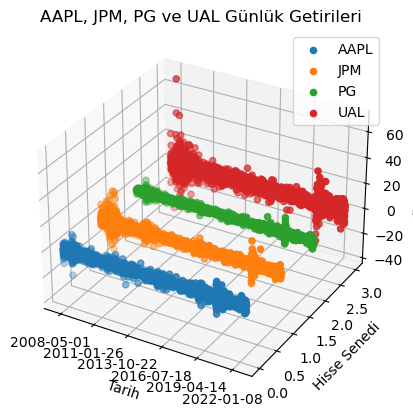

In [102]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

date_numbers = mdates.date2num(df.index)

ax.scatter(date_numbers, [0] * len(df), df['AAPL'], label='AAPL')
ax.scatter(date_numbers, [1] * len(df), df['JPM'], label='JPM')
ax.scatter(date_numbers, [2] * len(df), df['PG'], label='PG')
ax.scatter(date_numbers, [3] * len(df), df['UAL'], label='UAL')

ax.set_xlabel('Tarih')
ax.set_ylabel('Hisse Senedi')
ax.set_zlabel('Günlük Getiri')
ax.set_title('AAPL, JPM, PG ve UAL Günlük Getirileri')

ax.legend()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.show()

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Effective Data Visualization</b></p>